In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
data = {
    'Humidity (%)': [20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Rainfall (mm)': [2, 5, 15, 25, 40, 55, 70, 85, 100]
}

df = pd.DataFrame(data)

In [6]:
df['Rainfall_Category'] = pd.cut(df['Rainfall (mm)'], bins=[0, 20, 50, 110], labels=['Low', 'Medium', 'High'])

X = df[['Humidity (%)']]
y = df['Rainfall_Category']


In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [11]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [15]:
print("Logistic Classification Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_pred)]))

Logistic Classification Model Evaluation:
Accuracy: 1.0000

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



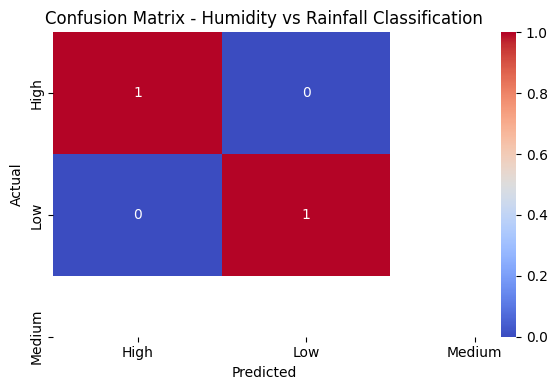

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Humidity vs Rainfall Classification")
plt.tight_layout()
plt.show()

In [17]:
def predict_rainfall_category(humidity):
    humidity_array = np.array([[humidity]])
    humidity_scaled = scaler.transform(humidity_array)
    predicted_category = model.predict(humidity_scaled)
    return le.inverse_transform(predicted_category)[0]

In [18]:
print("\nSample Predictions:")
test_humidity = [25, 50, 75, 95]
for hum in test_humidity:
    category = predict_rainfall_category(hum)
    print(f"For {hum}% humidity, predicted rainfall category: {category}")


Sample Predictions:
For 25% humidity, predicted rainfall category: Low
For 50% humidity, predicted rainfall category: Medium
For 75% humidity, predicted rainfall category: High
For 95% humidity, predicted rainfall category: High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
